In [1]:
from scipy import linalg as la
from scipy import optimize
import numpy as np
from matplotlib import pyplot as plt
import cmath
import math
from scipy.sparse import dok_matrix
import sympy as sy
from matplotlib import pyplot as plt
from numba import jit
from autograd import grad
import autograd.numpy as anp
from autograd import jacobian

## Problem 1.

In [40]:
f = lambda x : x**4 - 3
f_prime = lambda x : 4*x**3

def Newton(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        print(i)
        x1 = x0 - (f(x0)/f_prime(x0))
        print(x1)
        if la.norm(x1 - x0) < tol:
            print("Convergence achieved.")
            print("x_star =", x1)
            return x1
        else:
            x0 = x1

In [41]:
x1 = Newton(f, f_prime, 1, 10000, 1e-5)
optimize.newton(f, 1)

0
1.5
1
1.3472222222222223
2
1.3171376938034396
3
1.3160753007540056
4
1.3160740129543826
Convergence achieved.
x_star = 1.3160740129543826


1.3160740129524924

In [4]:
print (np.allclose(x1, optimize.newton(f, 1)))

True


## Problem 2.

In [10]:
def Newton_jacob(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        x1 = x0 - (f(x0)/jacobian_r_fn(x0)[0,0])
        if la.norm(x1 - x0) < tol:
            print("Convergence achieved.")
            print("x_star =", x1)
            return x1
        else:
            x0 = x1

In [11]:
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000

In [12]:
r0 = anp.array([.11])
r_fn = lambda r : anp.array([P2*(1 - (1 + r[0])**(-N2)) - P1*((1+r[0])**N1 - 1)])
jacobian_r_fn = jacobian(r_fn)

print(Newton_jacob(r_fn, jacobian_r_fn, r0, 10000, 1e-10))

x_star = [ 0.03877843]
[ 0.03877843]


## Problem 3.

In [14]:
f2 = lambda x : x**(1/3)
f2_prime = lambda x : (1/3) * x ** (-2/3)


f_modified = lambda x: np.sign(x) * np.power(np.abs(x), 1/3) 
f_modified_prime_plus = lambda x : np.cos(x) * np.power(np.abs(x), 1/3) \
                         + np.sign(x) * (1/3) * np.power(np.abs(x), -2/3)
f_modified_prime_minus = lambda x : np.cos(x) * np.power(np.abs(x), 1/3) \
                         - np.sign(x) * (1/3) * np.power(np.abs(x), -2/3)

f_2prime = lambda x : 12*x**2

In [36]:
def Modified_Newton(f, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):
    for i in range(N):
        if x0 >= 0:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
        else:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
        
        if abs(x1 - x0) < tol:
            print("Convergence achieved.")
            print("x_star=", x1)
            return x1
        elif i == N - 1:
            return False
        else:
            x0 = x1 

In [37]:
print(Modified_Newton(f2, f2_prime, f2_prime,  -1 ,10000, 1e-10, 0.1))

False


In [38]:
print(Modified_Newton(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01 ,10000, 1e-10, 1))

False


In [39]:
# at least it converges for alpha = 0.4...
print(Modified_Newton(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01 ,10000, 1e-10, 0.4))


Convergence achieved.
x_star= -6.51346510752e-12
-6.51346510752e-12


## Problem 4.

In [19]:
def Modified_Newton(f_modified, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):
    for i in range(N):
        if x0 >= 0:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
        else:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
        
        if abs(x1 - x0) < tol:
            return x1, i
        elif i == N - 1:
            return False, np.inf
        else:
            x0 = x1  

In [20]:
@jit
def alpha_plot(f_modified, f_modified_prime_plus, f_modified_prime_minus):
    iteration = []
    alpha = []
    for i in range(1000):
        alpha.append(i/1000)
        x1, j = Modified_Newton(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01, 1000, 1e-5, alpha[i])
        iteration.append(j)
    return alpha, iteration

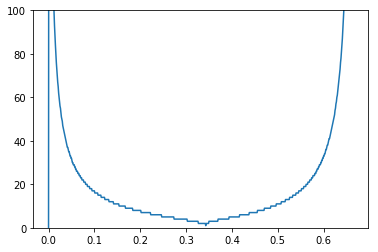

In [21]:
alpha, iteration = alpha_plot(f_modified, f_modified_prime_plus, f_modified_prime_minus)
plt.plot(alpha, iteration)
plt.ylim(0,100)
plt.show()

## Problem 5.

In [22]:
def Modified_Newton_n_dim(f_modified, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):

    Df =  np.zeros((np.size(x0), np.size(x0)))
    for i in range(N):
        if np.isscalar(x0):
            if x0 >= 0:
                x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
            else:
                x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
        
            if abs(x1 - x0) < tol:
                return x1
            elif i == N - 1:
                return False
            else:
                x0 = x1
              
        else:
            yk = la.solve(jacobian_f(x0), f_modified(x0))
            x1 = x0 - alpha * yk
            if la.norm(x1 - x0) < tol:
                return x1
            elif i == N - 1:
                return False
            else:
                x0 = x1

## Problem 6.

In [23]:
x0 =  anp.array([-0.25, 0.0005005])              
f = lambda x: anp.array([x[0]**2, x[0]+x[1] - 2])
jacobian_f = jacobian(f)

print(Modified_Newton_n_dim(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 0.5))
print(Modified_Newton_n_dim(f_modified, f_modified_prime_plus, f_modified_prime_minus, 1, 10000, 1e-5, 0.5))

[ -1.88348298e-05   2.00001883e+00]
-2.09894809985e-06


In [24]:
x0 =  anp.array([-0.0000311, 0.0005005])              
f = lambda x: anp.array( [5*x[0]*x[1] - x[0]*(1+x[1]), -1*x[0]*x[1] + (1-x[1])*(1+x[1]) ])
jacobian_f = jacobian(f)

print(Modified_Newton_n_dim(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 1))


[ -4.63687591e-16   1.00000000e+00]


In [28]:
x0 =  anp.array([-0.04411, 0.24445])              
f = lambda x: anp.array( [5*x[0]*x[1] - x[0]*(1+x[1]), -1*x[0]*x[1] + (1-x[1])*(1+x[1]) ])
jacobian_f = jacobian(f)

print(Modified_Newton_n_dim(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 0.55))

[ 3.74999408  0.24999754]


## Problem 7.

In [33]:
def Newton_for_mesh_grid(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        x1 = x0 - (f(x0)/f_prime(x0))
        if la.norm(x1 - x0) < tol:
            print("Convergence achieved.")
            print("x_star=", x1)
            return x1
        else:
            x0 = x1

In [34]:
def problem7(f, Df, r_min, r_max, i_min, i_max, rec, iters, tol):
    x_real = np.linspace(r_min, r_max, rec) # Real parts.
    x_imag = np.linspace(i_min, i_max, rec) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag # Combine real and imaginary parts.
    X_1 = X_0 - f(X_0)/Df(X_0)

    Result = Newton_for_mesh_grid(f, Df, X_0, iters, tol)
    Result_round = np.round(Result, 8) 
    y = np.unique(Result_round)
    howmanyroots = len(y)
    
    Y = np.zeros((rec, rec))
    for j in range(rec):
        for k in range(rec):
            Y[j, k]  = np.where(y == Result_round[j, k])[0]

    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.show()

Convergence achieved.
x_star= [[-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 ..., 
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]]


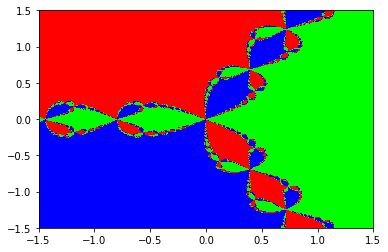

In [35]:
f7 = lambda x: x**3 - 1
Df7 = lambda x: 3*x**2

problem7(f7, Df7, -1.5, 1.5, -1.5, 1.5, 500, 10000, 1e-10)

f7_2 = lambda x: x**3 - x